<a href="https://colab.research.google.com/github/harshitgupta1998/Covid-19_dataset/blob/master/LSTM_and_CNN_26_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf


In [4]:
class cnn:
    def __init__(self):
        self.batch_size = 128
        self.dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/' #change to run locally
        self.num_of_classes,self.dict =create_dic(self.dir_data)
        self.image_size = 28
        self.validate_data = 10000

In [5]:
with open('mini_classes.txt','w') as f: #create a file for mini class
    for file in sorted(os.listdir('/content/drive/My Drive/BE_project_dataset_and_code/data/')): #see how to take data from google drive into colab 
        if file.endswith(".npy"): #copy from drive not local drive change accordingly
            print(file.split(".")[0], file = f)
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)


['ambulance', 'apple', 'axe', 'basketball', 'bicycle', 'boomerang', 'butterfly', 'car', 'carrot', 'cat', 'clock', 'cookie', 'cup', 'donut', 'envelope', 'flower', 'hammer', 'key', 'knife', 'lightning', 'pencil', 'pizza', 'rainbow', 'snake', 'spider', 'star', 'tractor', 'tree', 'whale', 'windmill']


In [6]:
dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/'
def create_dic(dir_data):
    dict={}
    i=0
    for file in sorted(os.listdir('/content/drive/My Drive/BE_project_dataset_and_code/data/')):
        if file.endswith(".npy"):
            str=file.split(".")
            dict[i]=str[0]
            i=i+1
    return i,dict

In [7]:
def load_data(cnn):
    dir_data='/content/drive/My Drive/BE_project_dataset_and_code/data/' #change to run locally all dir_data
    num_of_classess,dict=create_dic(dir_data)
    data_l=np.zeros((1))
    data_d=np.zeros((1,cnn.image_size*cnn.image_size))
    index=0
    class_names = []
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            print(data_l.shape,data_d.shape,"cur label num!",index+1,file)
            curr_data=np.load(dir_data+file)
            data_size=curr_data.shape
            #take only 30 percent of the data
            part_data=int(0.3*(data_size[0]))
            curr_data=curr_data[1:part_data,:]
            

            #change to white background
            curr_data=255-curr_data;
            data_d=np.concatenate((data_d,curr_data), axis=0)
            data_l=np.concatenate((data_l,np.ones(curr_data.shape[0])*index))
            index=index+1
            class_names.append(file.split('.')[0])

    data_l=np.expand_dims(data_l,1)
    data_all=np.concatenate((data_d,data_l),axis=1)
    data_all=np.random.permutation(data_all)

    x_data=data_all[:,0:-1]
    y_data=data_all[:,-1]
    num_img=x_data.shape[0]
    data_img=np.reshape(x_data,[num_img,cnn.image_size,cnn.image_size])


    data_train=data_img[cnn.validate_data:,:,:]
    data_train=np.expand_dims(data_train,3)

    labels_train=y_data[cnn.validate_data:]
    data_test=data_img[:cnn.validate_data:,:,:]
    data_test=np.expand_dims(data_test,3)

    labels_test=y_data[:cnn.validate_data]


    return data_train,labels_train,data_test,labels_test,class_names

In [8]:
quick_draw_cnn=cnn()
x_train, y_train, x_test, y_test, class_names = load_data(quick_draw_cnn)
num_classes = len(class_names)

(1,) (1, 784) cur label num! 1 ambulance.npy
(44401,) (44401, 784) cur label num! 2 apple.npy
(87816,) (87816, 784) cur label num! 3 axe.npy
(125051,) (125051, 784) cur label num! 4 basketball.npy
(165187,) (165187, 784) cur label num! 5 bicycle.npy
(203144,) (203144, 784) cur label num! 6 boomerang.npy
(245947,) (245947, 784) cur label num! 7 butterfly.npy
(281345,) (281345, 784) cur label num! 8 car.npy
(336173,) (336173, 784) cur label num! 9 carrot.npy
(375909,) (375909, 784) cur label num! 10 cat.npy
(412868,) (412868, 784) cur label num! 11 clock.npy
(449027,) (449027, 784) cur label num! 12 cookie.npy
(488431,) (488431, 784) cur label num! 13 cup.npy
(527646,) (527646, 784) cur label num! 14 donut.npy
(569870,) (569870, 784) cur label num! 15 envelope.npy
(610327,) (610327, 784) cur label num! 16 flower.npy
(653771,) (653771, 784) cur label num! 17 hammer.npy
(689473,) (689473, 784) cur label num! 18 key.npy
(737761,) (737761, 784) cur label num! 19 knife.npy
(789556,) (789556, 

In [9]:
x_train = x_train.reshape(x_train.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [10]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential

model_CNN1 = Sequential()

model_CNN1.add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='relu'))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN1.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN1.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN1.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu')) #try to use selu
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN1.add(layers.Flatten())

model_CNN1.add(layers.Dense(units=500, activation='relu'))
model_CNN1.add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model_CNN1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model_CNN1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)         

In [11]:
model_CNN1.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=10)
acc = model_CNN1.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Epoch 1/10
9603/9603 [==============================] - 45s 5ms/step - loss: 0.5882 - top_k_categorical_accuracy: 0.9592 - val_loss: 0.4107 - val_top_k_categorical_accuracy: 0.9757
Epoch 2/10
9603/9603 [==============================] - 44s 5ms/step - loss: 0.3724 - top_k_categorical_accuracy: 0.9769 - val_loss: 0.3595 - val_top_k_categorical_accuracy: 0.9781
Epoch 3/10
9603/9603 [==============================] - 44s 5ms/step - loss: 0.3397 - top_k_categorical_accuracy: 0.9788 - val_loss: 0.3485 - val_top_k_categorical_accuracy: 0.9778
Epoch 4/10
9603/9603 [==============================] - 45s 5ms/step - loss: 0.3233 - top_k_categorical_accuracy: 0.9796 - val_loss: 0.3359 - val_top_k_categorical_accuracy: 0.9803
Epoch 5/10
9603/9603 [==============================] - 44s 5ms/step - loss: 0.3128 - top_k_categorical_accuracy: 0.9802 - val_loss: 0.3279 - val_top_k_categorical_accuracy: 0.9799
Epoch 6/10
9603/9603 [==============================] - 44s 5ms/step - loss: 0.3060 - top_k_cat

In [12]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential

model_CNN2 = Sequential()

model_CNN2 .add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='relu'))
model_CNN2 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN2 .add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model_CNN2 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

#model_CNN2 .add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
#model_CNN2 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN2 .add(layers.Flatten())

model_CNN2 .add(layers.Dense(units=500, activation='relu'))

model_CNN2 .add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()

model_CNN2 .compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model_CNN2 .summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               784500    
_________________________________________________________________
dense_3 (Dense)              (None, 30)               

In [13]:
model_CNN2.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=10)
acc = model_CNN2.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Epoch 1/10
9603/9603 [==============================] - 39s 4ms/step - loss: 0.4658 - top_k_categorical_accuracy: 0.9680 - val_loss: 0.3546 - val_top_k_categorical_accuracy: 0.9770
Epoch 2/10
9603/9603 [==============================] - 39s 4ms/step - loss: 0.3106 - top_k_categorical_accuracy: 0.9802 - val_loss: 0.3202 - val_top_k_categorical_accuracy: 0.9801
Epoch 3/10
9603/9603 [==============================] - 39s 4ms/step - loss: 0.2756 - top_k_categorical_accuracy: 0.9827 - val_loss: 0.3014 - val_top_k_categorical_accuracy: 0.9821
Epoch 4/10
9603/9603 [==============================] - 38s 4ms/step - loss: 0.2535 - top_k_categorical_accuracy: 0.9846 - val_loss: 0.3044 - val_top_k_categorical_accuracy: 0.9813
Epoch 5/10
9603/9603 [==============================] - 40s 4ms/step - loss: 0.2365 - top_k_categorical_accuracy: 0.9860 - val_loss: 0.3100 - val_top_k_categorical_accuracy: 0.9816
Epoch 6/10
9603/9603 [==============================] - 39s 4ms/step - loss: 0.2228 - top_k_cat

In [14]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential

model_CNN3 = Sequential()

model_CNN3 .add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='selu'))
model_CNN3 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN3 .add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'selu'))
model_CNN3 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN3 .add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'selu'))
model_CNN3 .add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model_CNN3 .add(layers.Flatten())

model_CNN3 .add(layers.Dense(units=500, activation='selu'))

model_CNN3 .add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()

model_CNN3 .compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model_CNN3 .summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [15]:
model_CNN3.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=10)
acc = model_CNN3.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Epoch 1/10
9603/9603 [==============================] - 42s 4ms/step - loss: 0.5588 - top_k_categorical_accuracy: 0.9633 - val_loss: 0.4368 - val_top_k_categorical_accuracy: 0.9707
Epoch 2/10
9603/9603 [==============================] - 42s 4ms/step - loss: 0.3904 - top_k_categorical_accuracy: 0.9758 - val_loss: 0.4019 - val_top_k_categorical_accuracy: 0.9756
Epoch 3/10
9603/9603 [==============================] - 42s 4ms/step - loss: 0.3599 - top_k_categorical_accuracy: 0.9777 - val_loss: 0.3803 - val_top_k_categorical_accuracy: 0.9754
Epoch 4/10
9603/9603 [==============================] - 42s 4ms/step - loss: 0.3449 - top_k_categorical_accuracy: 0.9787 - val_loss: 0.3694 - val_top_k_categorical_accuracy: 0.9765
Epoch 5/10
9603/9603 [==============================] - 42s 4ms/step - loss: 0.3328 - top_k_categorical_accuracy: 0.9795 - val_loss: 0.3881 - val_top_k_categorical_accuracy: 0.9764
Epoch 6/10
9603/9603 [==============================] - 41s 4ms/step - loss: 0.3260 - top_k_cat

['tree', 'key', 'hammer', 'axe', 'lightning']
['tree', 'key', 'hammer', 'flower', 'carrot']
['tree', 'key', 'hammer', 'flower', 'carrot']


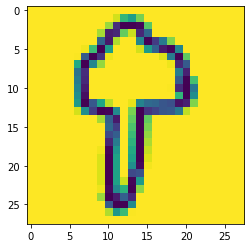

In [16]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
#idx = randint(0, len(x_test))
#idx=57
idx=50
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred_CNN1 = model_CNN1.predict(np.expand_dims(img, axis=0))[0]
ind_CNN1 = (-pred_CNN1).argsort()[:5]
latex_CNN1= [class_names[x] for x in ind_CNN1]
print(latex_CNN1)

pred_CNN2 = model_CNN2.predict(np.expand_dims(img, axis=0))[0]
ind_CNN2 = (-pred_CNN2).argsort()[:5]
latex_CNN2 = [class_names[x] for x in ind_CNN2]
print(latex_CNN2)

pred_CNN3 = model_CNN3.predict(np.expand_dims(img, axis=0))[0]
ind_CNN3 = (-pred_CNN3).argsort()[:5]
latex_CNN3 = [class_names[x] for x in ind_CNN3]
print(latex_CNN3)



In [17]:
scores = model_CNN1.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores = model_CNN2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

scores = model_CNN3.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.86%
Accuracy: 97.94%
Accuracy: 97.43%


In [18]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [19]:
x_train = np.array(x_train).reshape((-1, 28, 28))
x_test = np.array(x_test).reshape((-1, 28, 28))

In [20]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
model_LSTM1 =Sequential()
model_LSTM1.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model_LSTM1.add(Dense(30,activation='sigmoid'))
model_LSTM1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               291840    
_________________________________________________________________
dense_6 (Dense)              (None, 30)                7710      
Total params: 299,550
Trainable params: 299,550
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model_LSTM1.fit(x_train, y_train,
          batch_size=256,
          epochs=10,
          validation_data=(x_test, y_test))
acc = model_LSTM1.evaluate(x_test, y_test,batch_size=256)
print('Test accuracy:', acc[1])


Epoch 1/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.9412 - accuracy: 0.7234 - val_loss: 0.6282 - val_accuracy: 0.8174
Epoch 2/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.5266 - accuracy: 0.8470 - val_loss: 0.4733 - val_accuracy: 0.8601
Epoch 3/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.4340 - accuracy: 0.8742 - val_loss: 0.4269 - val_accuracy: 0.8710
Epoch 4/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3884 - accuracy: 0.8871 - val_loss: 0.3906 - val_accuracy: 0.8835
Epoch 5/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3585 - accuracy: 0.8957 - val_loss: 0.3802 - val_accuracy: 0.8900
Epoch 6/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3376 - accuracy: 0.9017 - val_loss: 0.3682 - val_accuracy: 0.8927
Epoch 7/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3212 - accuracy: 0.9063 - val_loss: 0.3617 - val_ac

In [22]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
model_LSTM2 =Sequential()
model_LSTM2.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model_LSTM2.add(Dense(30,activation='softmax'))  # CHANGE HERE RELU to sigmoid
model_LSTM2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_7 (Dense)              (None, 30)                7710      
Total params: 299,550
Trainable params: 299,550
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model_LSTM2.fit(x_train, y_train,
          batch_size=256,
          epochs=10,
          validation_data=(x_test, y_test))
acc = model_LSTM2.evaluate(x_test, y_test,batch_size=256)
print('Test accuracy:', acc[1])


Epoch 1/10
4802/4802 [==============================] - 33s 7ms/step - loss: 0.8747 - accuracy: 0.7415 - val_loss: 0.6043 - val_accuracy: 0.8209
Epoch 2/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.4951 - accuracy: 0.8554 - val_loss: 0.4737 - val_accuracy: 0.8619
Epoch 3/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.4137 - accuracy: 0.8794 - val_loss: 0.4047 - val_accuracy: 0.8829
Epoch 4/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3719 - accuracy: 0.8919 - val_loss: 0.3837 - val_accuracy: 0.8855
Epoch 5/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3444 - accuracy: 0.8996 - val_loss: 0.3770 - val_accuracy: 0.8892
Epoch 6/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3249 - accuracy: 0.9053 - val_loss: 0.3667 - val_accuracy: 0.8960
Epoch 7/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3094 - accuracy: 0.9098 - val_loss: 0.3475 - val_ac

In [24]:
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
model_LSTM3 =Sequential()
model_LSTM3.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model_LSTM3.add(Dense(30,activation='softplus'))  # CHANGE HERE RELU to sigmoid
model_LSTM3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_8 (Dense)              (None, 30)                7710      
Total params: 299,550
Trainable params: 299,550
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model_LSTM3.fit(x_train, y_train,
          batch_size=256,
          epochs=10,
          validation_data=(x_test, y_test))
acc = model_LSTM3.evaluate(x_test, y_test,batch_size=256)
print('Test accuracy:', acc[1])

Epoch 1/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.9348 - accuracy: 0.7253 - val_loss: 0.6252 - val_accuracy: 0.8175
Epoch 2/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.5259 - accuracy: 0.8470 - val_loss: 0.4727 - val_accuracy: 0.8644
Epoch 3/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.4323 - accuracy: 0.8744 - val_loss: 0.4266 - val_accuracy: 0.8781
Epoch 4/10
4802/4802 [==============================] - 31s 7ms/step - loss: 0.3863 - accuracy: 0.8880 - val_loss: 0.4013 - val_accuracy: 0.8844
Epoch 5/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3572 - accuracy: 0.8962 - val_loss: 0.3764 - val_accuracy: 0.8907
Epoch 6/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3360 - accuracy: 0.9023 - val_loss: 0.3715 - val_accuracy: 0.8911
Epoch 7/10
4802/4802 [==============================] - 32s 7ms/step - loss: 0.3204 - accuracy: 0.9065 - val_loss: 0.3636 - val_ac

In [26]:
scores = model_LSTM1.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores = model_LSTM2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores = model_LSTM3.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



Accuracy: 90.05%
Accuracy: 90.11%
Accuracy: 89.85%


This prediction of LSTM 1
['tree', 'key', 'flower', 'hammer', 'axe']
This prediction of LSTM 2
['tree', 'key', 'axe', 'hammer', 'flower']
This prediction of LSTM 3
['tree', 'hammer', 'axe', 'key', 'flower']
This is prediction of cnn 1
['tree', 'key', 'hammer', 'axe', 'lightning']
This is prediction of cnn 2
['tree', 'key', 'hammer', 'flower', 'carrot']

This is prediction of cnn 3
['tree', 'key', 'hammer', 'flower', 'carrot']


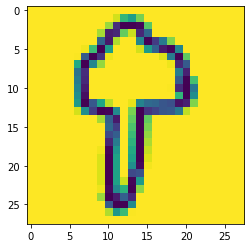

In [27]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
#idx = randint(0, len(x_test))
#idx=666
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred_LSTM1 = model_LSTM1.predict(np.expand_dims(img, axis=0))[0]
ind_LSTM1 = (-pred_LSTM1).argsort()[:5]
latex_LSTM1 = [class_names[x] for x in ind_LSTM1]
print("This prediction of LSTM 1")
print(latex_LSTM1)

pred_LSTM2 = model_LSTM2.predict(np.expand_dims(img, axis=0))[0]
ind_LSTM2 = (-pred_LSTM2).argsort()[:5]
latex_LSTM2 = [class_names[x] for x in ind_LSTM2]
print("This prediction of LSTM 2")
print(latex_LSTM2)


pred_LSTM3 = model_LSTM3.predict(np.expand_dims(img, axis=0))[0]
ind_LSTM3 = (-pred_LSTM3).argsort()[:5]
latex_LSTM3 = [class_names[x] for x in ind_LSTM3]
print("This prediction of LSTM 3")
print(latex_LSTM3)



#pred = model.predict(np.expand_dims(img, axis=0))[0]
#ind = (-pred).argsort()[:5]
#latex = [class_names[x] for x in ind]
#print(latex)
print("This is prediction of cnn 1")
print(latex_CNN1)
print("This is prediction of cnn 2")
print(latex_CNN2)
print()
print("This is prediction of cnn 3")
print(latex_CNN3)


In [28]:
def ensemble_predictions():
    # Empty list of predicted labels for each of the neural networks.
    pred_labels = []

    # Classification accuracy on the test-set for each network.
    test_accuracies = []
